In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

from scipy.signal import find_peaks

The critical points are[-1.  1.] [0.]


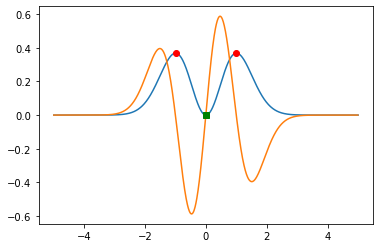

In [2]:
# empirical method
x = np.linspace(-5,5,1001)

fx = x**2  * np.exp(-x ** 2)

dfx = np.diff(fx) / (x[1] - x[0])


local_max = find_peaks(fx)[0]
local_min = find_peaks(-fx)[0]

print('The critical points are' + str(x[local_max]) + ' ' + str(x[local_min]) )

plt.plot(x, fx)
plt.plot(x[0:-1], dfx)

plt.plot(x[local_max], fx[local_max], 'ro')
plt.plot(x[local_min], fx[local_min], 'gs')
plt.show()

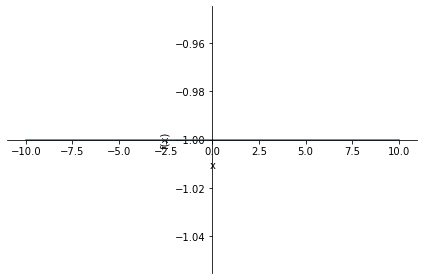

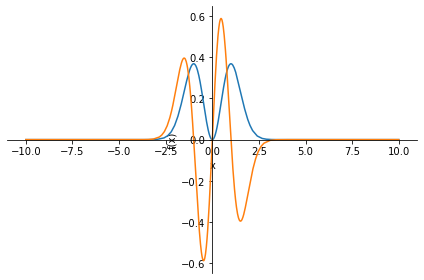

In [3]:
# symbolic method
from sympy.plotting import plot
x = sym.symbols('x')
fx = x**2 * sym.exp(-x ** 2)

dfx = sym.diff(fx)
critpoints = sym.solve(dfx)
critpoints

p1 = plot(fx, show=False)
p2 = plot(dfx, show=False)
p3 = plot(critpoints[0])

p1.extend(p2)

p1.show()
# plot with sympy

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

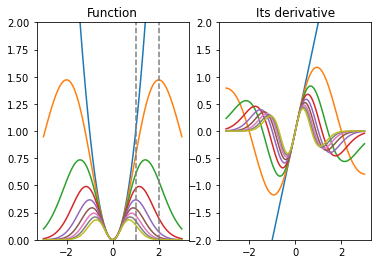

In [19]:
a, x = sym.symbols('a, x')

baseexpr = x**2 * sym.exp(-a*x**2)

arange = np.arange(0, 2.25, 0.25 )
xrange = np.linspace(-3,3, 100)


# setup the figure 

fig, ax = plt.subplots(1,2)

for ai in arange:
    fx = baseexpr.subs(a, ai)
    dfx = sym.diff(fx)
    critpoints = sym.solve(dfx)
    
    # plotting
    ax[0].plot(xrange, sym.lambdify(x, fx)(xrange))
    ax[1].plot(xrange, sym.lambdify(x, dfx)(xrange))
    
    # test for the critical points
    
    if 1 in critpoints:
        display(Math('\\Rightarrow %s \\text{ has a critical point at x=1!!!! wooohoooo}' %sym.latex(fx)))
    if 2 in critpoints: 
        display(Math('\\Rightarrow %s \\text{ has a critical point at x=1!!!! wooohoooo}' %sym.latex(fx)))
        
    else: 
        display(Math('\\quad %s \\text{ has NO critical points at x=1 or x=2.}' %sym.latex(fx)))
        
    
ax[0].set_ylim([0,2])
ax[0].set_title('Function')
ax[0].plot([1,1], [0,2], '--', color= "gray")
ax[0].plot([2,2], [0,2], '--', color= "gray")

ax[1].set_ylim([-2,2])
ax[1].set_title("Its derivative")


plt.show()